In [1]:
import os, sys
sys.path.append(os.path.join(os.path.expanduser("~"),"CLEOPE/Trials/modules"))
import qm
import data_processing_S2_affine as dp
import rasterio.plot

In [2]:
import datetime
import pandas as pd

In [3]:
import xarray as xr
import rioxarray
import numpy as np

In [4]:
import data_S2 as dp2

In [5]:
files = dp2.queryS2('product_list_202001-local.txt') #load local file

In [6]:
def paths_to_datetimeindex2(paths):
    string_slice=(7,-12) #string_slice=(45,60)
    date_strings = [os.path.basename(i)[slice(*string_slice)]
                    for i in paths]
    return pd.to_datetime(date_strings)

In [55]:
nirlist= []
redlist= []

for file in files:
    #filelist.append(file)
    nir= dp.bands(file,res='10m')[4]#b8
    red= dp.bands(file,res='10m')[3]
    nirlist.append(nir)
    redlist.append(red)
    #files_b.append(dp.bands(file,res='10m')[4])
time_var = xr.Variable('time', paths_to_datetimeindex2(redlist))

In [8]:
nir_da_gran =  xr.concat([xr.open_rasterio(i,chunks={'x':512, 'y':512}) for i in nirlist],   #
                        dim=time_var)

In [10]:
dx = 2
dy = 3

In [11]:
mask_lon_nir = (nir_da_gran.x >= (429770-dx)) & (nir_da_gran.x <= (433953+dx))   
mask_lat_nir = (nir_da_gran.y >= (4666780-dy)) & (nir_da_gran.y <= (4672292+dy))  

In [12]:
nir_da = nir_da_gran.where(mask_lon_nir & mask_lat_nir, drop=True)

In [13]:
new_nir_da = xr.DataArray(nir_da,dims=nir_da.dims,attrs= nir_da.attrs.copy())


In [54]:
nir_ds = new_nir_da.to_dataset('band')
nir_ds = nir_ds.rename({1: 'nir'})


In [52]:
red_da_gran = xr.concat([xr.open_rasterio(i,chunks={'x':512, 'y':512}) for i in redlist],    #
                        dim=time_var)


In [16]:
mask_lon_red = (red_da_gran.x >= (429770-dx)) & (red_da_gran.x <= (433953+dx))   
mask_lat_red = (red_da_gran.y >= (4666780-dy)) & (red_da_gran.y <= (4672292+dy))

In [17]:
red_da = red_da_gran.where(mask_lon_red & mask_lat_red, drop=True)

In [53]:
new_red_ds = xr.DataArray(red_da,dims=red_da.dims,attrs= red_da.attrs.copy())


In [56]:
red_ds = new_red_ds.to_dataset('band')
red_ds = red_ds.rename({1: 'red'})

In [60]:
scl = []
for file in files:
    scl_list = dp2.sclbands(file)[1]     
    #print(scl_list)
    scl.append(scl_list)

In [61]:
scl_da = xr.concat([xr.open_rasterio(i,chunks={'x':512, 'y':512}) for i in scl],  #
                        dim=time_var)


Exception ignored in: <function CachingFileManager.__del__ at 0x7f0a85343830>
Traceback (most recent call last):
  File "/home/jupyter-juser03/.local/lib/python3.7/site-packages/xarray/backends/file_manager.py", line 238, in __del__
    ref_count = self._ref_counter.decrement(self._key)
AttributeError: 'CachingFileManager' object has no attribute '_ref_counter'


In [22]:
mask_lon_scl = (scl_da.x >= (429770-120-dx)) & (scl_da.x <= (433953+120+dx))   
mask_lat_scl = (scl_da.y >= (4666780-120-dy)) & (scl_da.y <= (4672292+120+dy))

In [23]:
scl_da = scl_da.where(mask_lon_scl & mask_lat_scl, drop=True)
scl_da

<xarray.DataArray (time: 6, band: 1, y: 96, x: 74)>
dask.array<where, shape=(6, 1, 96, 74), dtype=float64, chunksize=(1, 1, 52, 57), chunktype=numpy.ndarray>
Coordinates:
  * band     (band) int64 1
  * y        (y) float64 4.672e+06 4.672e+06 4.672e+06 ... 4.667e+06 4.667e+06
  * x        (x) float64 4.297e+05 4.298e+05 4.298e+05 ... 4.34e+05 4.341e+05
  * time     (time) datetime64[ns] 2020-01-01T10:54:41 ... 2020-01-16T10:53:09
Attributes:
    transform:   (60.0, 0.0, 399960.0, 0.0, -60.0, 4700040.0)
    crs:         +init=epsg:32631
    res:         (60.0, 60.0)
    is_tiled:    1
    nodatavals:  (nan,)
    scales:      (1.0,)
    offsets:     (0.0,)

In [24]:
new_scl_da = xr.DataArray(scl_da,dims=scl_da.dims,attrs= scl_da.attrs.copy())
new_scl_da

<xarray.DataArray (time: 6, band: 1, y: 96, x: 74)>
array([[[[4., 4., 4., ..., 4., 2., 2.],
         [4., 4., 4., ..., 5., 5., 4.],
         [2., 4., 2., ..., 4., 4., 4.],
         ...,
         [4., 4., 4., ..., 5., 7., 2.],
         [4., 4., 2., ..., 3., 2., 2.],
         [4., 4., 4., ..., 3., 2., 2.]]],


       [[[4., 4., 4., ..., 4., 2., 4.],
         [4., 4., 4., ..., 5., 5., 4.],
         [4., 4., 2., ..., 4., 4., 4.],
         ...,
         [4., 4., 4., ..., 5., 7., 2.],
         [4., 4., 2., ..., 5., 2., 2.],
         [4., 4., 4., ..., 2., 2., 2.]]],


       [[[4., 4., 4., ..., 4., 2., 2.],
         [4., 4., 4., ..., 5., 2., 4.],
...
         [4., 4., 3., ..., 5., 2., 3.],
         [4., 4., 4., ..., 3., 3., 2.]]],


       [[[8., 8., 8., ..., 8., 8., 8.],
         [8., 8., 8., ..., 8., 8., 8.],
         [8., 8., 8., ..., 8., 8., 8.],
         ...,
         [8., 8., 8., ..., 8., 8., 8.],
         [8., 8., 8., ..., 8., 8., 8.],
         [8., 8., 8., ..., 8., 8., 8.]]],


       [[[4., 4., 4., ..., 4., 2., 4.],
         [4., 4., 4., ..., 5., 5., 4.],
         [4., 4., 2., ..., 5., 5., 4.],
         ...,
         [4., 4., 4., ..., 5., 7., 2.],
         [4., 4., 2., ..., 5., 5., 2.],
         [4., 4., 4., ..., 2., 2., 2.]]]])
Coordinates:
  * band     (band) int64 1
  * y        (y) float64 4.672e+06 4.672e+06 4.672e+06 ... 4.667e+06 4.667e+06
  * x        (x) float64 4.297e+05 4.298e+05 4.298e+05 ... 4.34e+05 4.341e+05
  * time     (time) datetime64[ns] 2020-01-01T10:54:41 ... 2020-01-16T10:53:09
Attributes:
    transform:   (60.0, 0.0, 399960.0, 0.0, -60.0, 4700040.0)
    crs:         +init=epsg:32631
    res:         (60.0, 60.0)
    is_tiled:    1
    nodatavals:  (nan,)
    scales:      (1.0,)
    offsets:     (0.0,)

In [25]:
#new_scl_da = new_scl_da.interp_like(red_ds, method='nearest') #.values[0,0,0]
new_scl_da = new_scl_da.interp(y=red_ds["y"], x=red_ds["x"], method='nearest')
new_scl_da

<xarray.DataArray (time: 6, band: 1, y: 552, x: 419)>
array([[[[4., 2., 2., ..., 4., 4., 4.],
         [4., 2., 2., ..., 4., 4., 4.],
         [4., 2., 2., ..., 4., 4., 4.],
         ...,
         [4., 4., 4., ..., 5., 5., 5.],
         [4., 2., 2., ..., 3., 3., 3.],
         [4., 2., 2., ..., 3., 3., 3.]]],


       [[[4., 2., 2., ..., 4., 4., 4.],
         [4., 2., 2., ..., 4., 4., 4.],
         [4., 2., 2., ..., 4., 4., 4.],
         ...,
         [4., 4., 4., ..., 5., 5., 5.],
         [4., 2., 2., ..., 5., 5., 5.],
         [4., 2., 2., ..., 5., 5., 5.]]],


       [[[4., 2., 2., ..., 5., 5., 5.],
         [4., 2., 2., ..., 5., 5., 5.],
...
         [4., 3., 3., ..., 5., 5., 5.],
         [4., 3., 3., ..., 5., 5., 5.]]],


       [[[8., 8., 8., ..., 8., 8., 8.],
         [8., 8., 8., ..., 8., 8., 8.],
         [8., 8., 8., ..., 8., 8., 8.],
         ...,
         [8., 8., 8., ..., 8., 8., 8.],
         [8., 8., 8., ..., 8., 8., 8.],
         [8., 8., 8., ..., 8., 8., 8.]]],


       [[[4., 2., 2., ..., 5., 5., 5.],
         [4., 2., 2., ..., 5., 5., 5.],
         [4., 2., 2., ..., 5., 5., 5.],
         ...,
         [4., 4., 4., ..., 5., 5., 5.],
         [4., 2., 2., ..., 5., 5., 5.],
         [4., 2., 2., ..., 5., 5., 5.]]]])
Coordinates:
  * band     (band) int64 1
  * time     (time) datetime64[ns] 2020-01-01T10:54:41 ... 2020-01-16T10:53:09
  * y        (y) float64 4.672e+06 4.672e+06 4.672e+06 ... 4.667e+06 4.667e+06
  * x        (x) float64 4.298e+05 4.298e+05 4.298e+05 ... 4.339e+05 4.34e+05
Attributes:
    transform:   (60.0, 0.0, 399960.0, 0.0, -60.0, 4700040.0)
    crs:         +init=epsg:32631
    res:         (60.0, 60.0)
    is_tiled:    1
    nodatavals:  (nan,)
    scales:      (1.0,)
    offsets:     (0.0,)

In [26]:
scl_ds = new_scl_da.to_dataset('band')
scl_ds

<xarray.Dataset>
Dimensions:  (time: 6, x: 419, y: 552)
Coordinates:
  * time     (time) datetime64[ns] 2020-01-01T10:54:41 ... 2020-01-16T10:53:09
  * y        (y) float64 4.672e+06 4.672e+06 4.672e+06 ... 4.667e+06 4.667e+06
  * x        (x) float64 4.298e+05 4.298e+05 4.298e+05 ... 4.339e+05 4.34e+05
Data variables:
    1        (time, y, x) float64 4.0 2.0 2.0 2.0 2.0 ... 4.0 5.0 5.0 5.0 5.0
Attributes:
    transform:   (60.0, 0.0, 399960.0, 0.0, -60.0, 4700040.0)
    crs:         +init=epsg:32631
    res:         (60.0, 60.0)
    is_tiled:    1
    nodatavals:  (nan,)
    scales:      (1.0,)
    offsets:     (0.0,)

In [27]:
scl_ds = scl_ds.rename({1:'scl'})
#scl_ds = scl_ds.astype('int16')
scl_ds

<xarray.Dataset>
Dimensions:  (time: 6, x: 419, y: 552)
Coordinates:
  * time     (time) datetime64[ns] 2020-01-01T10:54:41 ... 2020-01-16T10:53:09
  * y        (y) float64 4.672e+06 4.672e+06 4.672e+06 ... 4.667e+06 4.667e+06
  * x        (x) float64 4.298e+05 4.298e+05 4.298e+05 ... 4.339e+05 4.34e+05
Data variables:
    scl      (time, y, x) float64 4.0 2.0 2.0 2.0 2.0 ... 4.0 5.0 5.0 5.0 5.0
Attributes:
    transform:   (60.0, 0.0, 399960.0, 0.0, -60.0, 4700040.0)
    crs:         +init=epsg:32631
    res:         (60.0, 60.0)
    is_tiled:    1
    nodatavals:  (nan,)
    scales:      (1.0,)
    offsets:     (0.0,)

In [28]:
ds=xr.merge([nir_ds,red_ds,scl_ds])   #, compat='no_conflicts', join='left')  #broadcast_equals  #exact indexes along dimension x are not equal
#ds

In [30]:
ndvi=(ds['nir']-ds['red'])/(ds['nir']+ds['red'])
ndvi

<xarray.DataArray (time: 6, y: 552, x: 419)>
array([[[0.70331588, 0.76334107, 0.84496124, ..., 0.5370019 ,
         0.43087971, 0.43417825],
        [0.93188854, 0.86419753, 0.88297872, ..., 0.46851654,
         0.444333  , 0.45020652],
        [0.99344262, 0.83030303, 0.75054705, ..., 0.49074074,
         0.47045455, 0.43041109],
        ...,
        [0.66506667, 0.63939808, 0.63652858, ..., 0.54205607,
         0.55211558, 0.52771619],
        [0.6875359 , 0.65776699, 0.63820316, ..., 0.48209366,
         0.49926145, 0.50540958],
        [0.65463918, 0.64083176, 0.6115454 , ..., 0.5284128 ,
         0.52490421, 0.47109471]],

       [[0.61011591, 0.67519005, 0.69439728, ..., 0.47923791,
         0.46857143, 0.43884892],
        [0.70351105, 0.81118881, 0.85557987, ..., 0.51012146,
         0.45759369, 0.40261866],
        [0.89664083, 0.9380805 , 0.98879552, ..., 0.47702407,
         0.42566191, 0.40935412],
...
        [0.25313453, 0.25903204, 0.25479452, ..., 0.25167038,
         0.24398625, 0.23719835],
        [0.26039536, 0.25736058, 0.25227114, ..., 0.23734533,
         0.26048435, 0.24396135],
        [0.26109752, 0.25453278, 0.24442847, ..., 0.20546318,
         0.22523659, 0.225     ]],

       [[0.59918616, 0.64575646, 0.67261905, ..., 0.47857143,
         0.46630237, 0.43273048],
        [0.72891566, 0.68796434, 0.72240803, ..., 0.4836147 ,
         0.42437174, 0.4351145 ],
        [0.7338403 , 0.72925764, 0.77634409, ..., 0.4828469 ,
         0.42409403, 0.42030238],
        ...,
        [0.59880686, 0.59109312, 0.59054326, ..., 0.48160821,
         0.49847892, 0.48221522],
        [0.61009401, 0.58731782, 0.58432182, ..., 0.48526863,
         0.53903002, 0.51996057],
        [0.62399793, 0.60802958, 0.57967947, ..., 0.44548976,
         0.51074956, 0.51105937]]])
Coordinates:
  * y        (y) float64 4.672e+06 4.672e+06 4.672e+06 ... 4.667e+06 4.667e+06
  * x        (x) float64 4.298e+05 4.298e+05 4.298e+05 ... 4.339e+05 4.34e+05
  * time     (time) datetime64[ns] 2020-01-01T10:54:41 ... 2020-01-16T10:53:09

In [31]:
scl = ds['scl']
good_data = scl.where((scl == 4) | (scl == 5) | (scl == 6))
#good_data
ndvi_no_cloud = ndvi.where(good_data>=0)
ndvi_no_cloud

<xarray.DataArray (time: 6, y: 552, x: 419)>
array([[[0.70331588,        nan,        nan, ..., 0.5370019 ,
         0.43087971, 0.43417825],
        [0.93188854,        nan,        nan, ..., 0.46851654,
         0.444333  , 0.45020652],
        [0.99344262,        nan,        nan, ..., 0.49074074,
         0.47045455, 0.43041109],
        ...,
        [0.66506667, 0.63939808, 0.63652858, ..., 0.54205607,
         0.55211558, 0.52771619],
        [0.6875359 ,        nan,        nan, ...,        nan,
                nan,        nan],
        [0.65463918,        nan,        nan, ...,        nan,
                nan,        nan]],

       [[0.61011591,        nan,        nan, ..., 0.47923791,
         0.46857143, 0.43884892],
        [0.70351105,        nan,        nan, ..., 0.51012146,
         0.45759369, 0.40261866],
        [0.89664083,        nan,        nan, ..., 0.47702407,
         0.42566191, 0.40935412],
...
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan]],

       [[0.59918616,        nan,        nan, ..., 0.47857143,
         0.46630237, 0.43273048],
        [0.72891566,        nan,        nan, ..., 0.4836147 ,
         0.42437174, 0.4351145 ],
        [0.7338403 ,        nan,        nan, ..., 0.4828469 ,
         0.42409403, 0.42030238],
        ...,
        [0.59880686, 0.59109312, 0.59054326, ..., 0.48160821,
         0.49847892, 0.48221522],
        [0.61009401,        nan,        nan, ..., 0.48526863,
         0.53903002, 0.51996057],
        [0.62399793,        nan,        nan, ..., 0.44548976,
         0.51074956, 0.51105937]]])
Coordinates:
  * y        (y) float64 4.672e+06 4.672e+06 4.672e+06 ... 4.667e+06 4.667e+06
  * x        (x) float64 4.298e+05 4.298e+05 4.298e+05 ... 4.339e+05 4.34e+05
  * time     (time) datetime64[ns] 2020-01-01T10:54:41 ... 2020-01-16T10:53:09

In [32]:
ndvi_no_cloud.values

array([[[0.70331588,        nan,        nan, ..., 0.5370019 ,
         0.43087971, 0.43417825],
        [0.93188854,        nan,        nan, ..., 0.46851654,
         0.444333  , 0.45020652],
        [0.99344262,        nan,        nan, ..., 0.49074074,
         0.47045455, 0.43041109],
        ...,
        [0.66506667, 0.63939808, 0.63652858, ..., 0.54205607,
         0.55211558, 0.52771619],
        [0.6875359 ,        nan,        nan, ...,        nan,
                nan,        nan],
        [0.65463918,        nan,        nan, ...,        nan,
                nan,        nan]],

       [[0.61011591,        nan,        nan, ..., 0.47923791,
         0.46857143, 0.43884892],
        [0.70351105,        nan,        nan, ..., 0.51012146,
         0.45759369, 0.40261866],
        [0.89664083,        nan,        nan, ..., 0.47702407,
         0.42566191, 0.40935412],
        ...,
        [0.61985958, 0.62211982, 0.60062321, ..., 0.49892566,
         0.4799117 , 0.47805569],
        [0.6

In [33]:
ndvi_no_cloud.isel(time=0)

<xarray.DataArray (y: 552, x: 419)>
array([[0.70331588,        nan,        nan, ..., 0.5370019 , 0.43087971,
        0.43417825],
       [0.93188854,        nan,        nan, ..., 0.46851654, 0.444333  ,
        0.45020652],
       [0.99344262,        nan,        nan, ..., 0.49074074, 0.47045455,
        0.43041109],
       ...,
       [0.66506667, 0.63939808, 0.63652858, ..., 0.54205607, 0.55211558,
        0.52771619],
       [0.6875359 ,        nan,        nan, ...,        nan,        nan,
               nan],
       [0.65463918,        nan,        nan, ...,        nan,        nan,
               nan]])
Coordinates:
  * y        (y) float64 4.672e+06 4.672e+06 4.672e+06 ... 4.667e+06 4.667e+06
  * x        (x) float64 4.298e+05 4.298e+05 4.298e+05 ... 4.339e+05 4.34e+05
    time     datetime64[ns] 2020-01-01T10:54:41

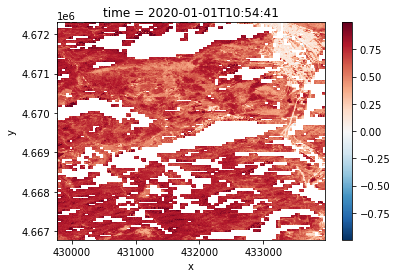

In [34]:
ndvi_no_cloud.isel(time=0).plot()

In [35]:
#ndvi_sth=ndvi_no_cloud.rolling(time=5, min_periods=1, center=True).mean()
ndvi_sth=ndvi_no_cloud.rolling(time=1, min_periods=1, center=True).mean()
#ndvi_sth=ndvi_no_cloud.rolling(time=5, min_periods=1, center=True).mean()
ndvi_sth

<xarray.DataArray (time: 6, y: 552, x: 419)>
array([[[0.70331588,        nan,        nan, ..., 0.5370019 ,
         0.43087971, 0.43417825],
        [0.93188854,        nan,        nan, ..., 0.46851654,
         0.444333  , 0.45020652],
        [0.99344262,        nan,        nan, ..., 0.49074074,
         0.47045455, 0.43041109],
        ...,
        [0.66506667, 0.63939808, 0.63652858, ..., 0.54205607,
         0.55211558, 0.52771619],
        [0.6875359 ,        nan,        nan, ...,        nan,
                nan,        nan],
        [0.65463918,        nan,        nan, ...,        nan,
                nan,        nan]],

       [[0.61011591,        nan,        nan, ..., 0.47923791,
         0.46857143, 0.43884892],
        [0.70351105,        nan,        nan, ..., 0.51012146,
         0.45759369, 0.40261866],
        [0.89664083,        nan,        nan, ..., 0.47702407,
         0.42566191, 0.40935412],
...
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan]],

       [[0.59918616,        nan,        nan, ..., 0.47857143,
         0.46630237, 0.43273048],
        [0.72891566,        nan,        nan, ..., 0.4836147 ,
         0.42437174, 0.4351145 ],
        [0.7338403 ,        nan,        nan, ..., 0.4828469 ,
         0.42409403, 0.42030238],
        ...,
        [0.59880686, 0.59109312, 0.59054326, ..., 0.48160821,
         0.49847892, 0.48221522],
        [0.61009401,        nan,        nan, ..., 0.48526863,
         0.53903002, 0.51996057],
        [0.62399793,        nan,        nan, ..., 0.44548976,
         0.51074956, 0.51105937]]])
Coordinates:
  * y        (y) float64 4.672e+06 4.672e+06 4.672e+06 ... 4.667e+06 4.667e+06
  * x        (x) float64 4.298e+05 4.298e+05 4.298e+05 ... 4.339e+05 4.34e+05
  * time     (time) datetime64[ns] 2020-01-01T10:54:41 ... 2020-01-16T10:53:09

In [36]:
y=np.squeeze(ndvi_sth.values)

In [37]:
ndvi_sth.coords

Coordinates:
  * y        (y) float64 4.672e+06 4.672e+06 4.672e+06 ... 4.667e+06 4.667e+06
  * x        (x) float64 4.298e+05 4.298e+05 4.298e+05 ... 4.339e+05 4.34e+05
  * time     (time) datetime64[ns] 2020-01-01T10:54:41 ... 2020-01-16T10:53:09

In [38]:
x=ndvi_sth.coords['time'].values

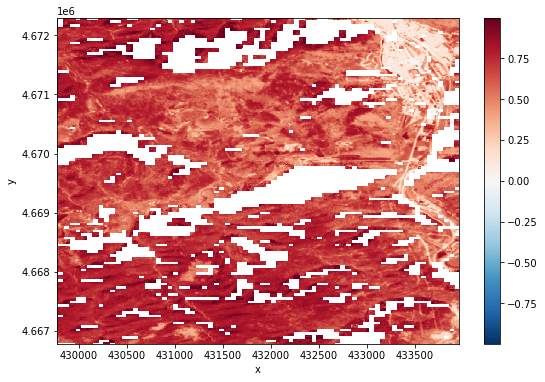

In [39]:
ndvi_sth.mean(dim=['time']).plot(size=6)

In [40]:
mask = ndvi_sth.isnull()
#mask
ndvi_cl = ndvi_sth.where(~mask, other=0)

vPOS = Value at peak of season:

In [41]:
ndvi_cl.max("time").values

array([[0.70331588, 0.        , 0.        , ..., 0.5370019 , 0.46857143,
        0.44631839],
       [0.93188854, 0.        , 0.        , ..., 0.51012146, 0.45880234,
        0.45020652],
       [0.99344262, 0.        , 0.        , ..., 0.49074074, 0.47045455,
        0.4329184 ],
       ...,
       [0.66506667, 0.63939808, 0.63652858, ..., 0.54205607, 0.55211558,
        0.52771619],
       [0.6875359 , 0.        , 0.        , ..., 0.53526221, 0.54359219,
        0.5408805 ],
       [0.66084918, 0.        , 0.        , ..., 0.45498199, 0.5275    ,
        0.51105937]])

POS = DOY of peak of season

In [42]:
computed_ndvi_cl = ndvi_cl.load()
type(computed_ndvi_cl.data)
computed_ndvi_cl
ndvi_cl.isel(time=computed_ndvi_cl.argmax("time")).time.dt.dayofyear.values

array([[ 1,  1,  1, ...,  1,  6, 11],
       [ 1,  1,  1, ...,  6, 11,  1],
       [ 1,  1,  1, ...,  1,  1, 11],
       ...,
       [ 1,  1,  1, ...,  1,  1,  1],
       [ 1,  1,  1, ...,  6,  6,  6],
       [ 6,  1,  1, ...,  6,  6, 16]])

Trough = Minimum value

In [43]:
ndvi_cl.min("time").values

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

AOS = Amplitude of season

In [44]:
ndvi_cl.max("time")-ndvi_cl.min("time").values

<xarray.DataArray (y: 552, x: 419)>
array([[0.70331588, 0.        , 0.        , ..., 0.5370019 , 0.46857143,
        0.44631839],
       [0.93188854, 0.        , 0.        , ..., 0.51012146, 0.45880234,
        0.45020652],
       [0.99344262, 0.        , 0.        , ..., 0.49074074, 0.47045455,
        0.4329184 ],
       ...,
       [0.66506667, 0.63939808, 0.63652858, ..., 0.54205607, 0.55211558,
        0.52771619],
       [0.6875359 , 0.        , 0.        , ..., 0.53526221, 0.54359219,
        0.5408805 ],
       [0.66084918, 0.        , 0.        , ..., 0.45498199, 0.5275    ,
        0.51105937]])
Coordinates:
  * y        (y) float64 4.672e+06 4.672e+06 4.672e+06 ... 4.667e+06 4.667e+06
  * x        (x) float64 4.298e+05 4.298e+05 4.298e+05 ... 4.339e+05 4.34e+05

vSOS = Value at the start of season

In [45]:
# select timesteps before peak of season (AKA greening)
greenup = ndvi_cl.where(ndvi_cl.time < ndvi_cl.isel(time=ndvi_cl.argmax("time")).time)
# find the first order slopes
green_deriv = greenup.differentiate("time")
# find where the first order slope is postive
pos_green_deriv = green_deriv.where(green_deriv > 0)
# positive slopes on greening side
pos_greenup = greenup.where(pos_green_deriv)
#pos_greenup

In [46]:
# find the median
median = pos_greenup.median("time")
#median

In [47]:
# distance of values from median
distance = pos_greenup - median
#distance

In [48]:
def allNaN_arg(da, dim, stat):
    """
    Calculate da.argmax() or da.argmin() while handling
    all-NaN slices. Fills all-NaN locations with an
    float and then masks the offending cells.
    Params
    ------
    xarr : xarray.DataArray
    dim : str, 
            Dimension over which to calculate argmax, argmin e.g. 'time'
    stat : str,
        The statistic to calculte, either 'min' for argmin()
        or 'max' for .argmax()
    Returns
    ------
    xarray.DataArray
    """
    # generate a mask where entire axis along dimension is NaN
    mask = da.isnull().all(dim)

    if stat == "max":
        y = da.fillna(float(da.min() - 1))
        y = y.argmax(dim=dim, skipna=True).where(~mask)
        return y

    if stat == "min":
        y = da.fillna(float(da.max() + 1))
        y = y.argmin(dim=dim, skipna=True).where(~mask)
        return y


In [49]:
# find index (argmin) where distance is most negative
idx = allNaN_arg(distance, "time", "min").astype("int16")

In [50]:
# find index (argmin) where distance is smallest absolute value
idx = allNaN_arg(xr.ufuncs.fabs(distance), "time", "min").astype("int16")
idx.values

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1]], dtype=int16)

SOS = DOY for start of season

In [51]:
ndvi_cl.coords['time'].values[idx.values[0][0]]

numpy.datetime64('2020-01-01T10:54:41.000000000')